# **Data Handling on Multi-omics Gleason Score Dataset (Mergefile_top20(4).csv)**

**Importing necessary libraries and checking the availability of the GPU**

In [102]:
from xmlrpc.client import Binary

import tensorflow as tf
from keras.src.metrics import BinaryCrossentropy

In [103]:
import numpy as np
print(np.__version__)

1.26.4


In [104]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

**Loading in the CSV file using Pandas**

In [106]:
#Multi_omics dataset
df1 = pd.read_csv(r'/home/sanven0212/PycharmProjects/MultiOmicsFYP/Mergefile_top20 (4).csv')
df1.head(10)

,GE_SPOP,GE_FOXA1,GE_CTNNB1,GE_CLPTM1L,GE_DPYSL2,GE_NEIL1,GE_PITPNM2,GE_ATM,GE_EMG1,GE_ETV3,...,DM_SLC27A4,DM_PITPNM2,DM_PTEN,DM_EMG1,DM_ETV3,DM_BRAF,DM_NKX3-1,DM_SALL1,PATIENT_ID,TUMOR_STAGE
0,0.489097,0.749514,0.703490,0.187461,0.2973152983628573,0.744052,0.677605,0.736915,0.165418,0.927902,...,0.309464,0.717767,0.075158,0.395376,0.900153,0.228063,0.592166,0.815008,TCGA-2A-A8VT,45
1,0.373498,0.790415,0.648564,0.367439,0.0,0.638505,0.156215,0.673907,0.384063,0.807230,...,0.000000,0.791218,0.045264,0.090997,0.942279,0.257308,0.093755,0.762329,TCGA-2A-A8W1,43
2,0.316560,0.714836,0.794977,0.363893,0.523421844750116,0.659055,0.609083,0.759267,0.107208,0.827580,...,0.493194,0.782551,0.086650,0.638757,0.923586,0.210818,0.472227,0.883677,TCGA-2A-A8W3,45
3,0.433556,0.637116,0.777338,0.559615,0.47676041700945415,0.623626,0.415425,0.539748,0.466929,0.599673,...,0.085465,0.569465,0.047191,0.101831,0.930270,0.221800,0.257343,1.000000,TCGA-2A-AAYF,34
4,0.363634,0.624428,0.892508,0.501788,0.4722603494002571,0.465397,0.619784,0.562305,0.450817,0.729161,...,0.119817,0.907230,0.082071,0.155321,0.901625,0.171257,0.201274,0.695265,TCGA-CH-5737,43
5,0.540453,0.630588,0.671140,0.275536,0.6624865041294341,0.476065,0.577890,0.824079,0.297729,0.899286,...,0.230212,0.831449,0.040868,0.266358,0.943859,0.178990,0.505571,0.831493,TCGA-CH-5739,34
6,0.506989,0.590670,0.727922,0.255442,0.733651313733152,0.691024,0.398213,0.644989,0.383090,0.713497,...,0.502728,0.836422,0.036482,0.328812,0.954992,0.185582,0.391752,0.892649,TCGA-CH-5740,34
7,0.602648,0.780246,0.681841,0.362920,0.3562344997922704,0.631882,0.189198,0.589256,0.521341,0.691657,...,0.267739,0.839557,0.314925,0.271794,0.858322,0.119971,0.345410,0.831250,TCGA-CH-5741,45
8,0.476160,0.319457,0.926185,0.172214,0.7113577651903742,0.589873,0.692148,0.797628,0.445715,0.904204,...,0.711538,0.562896,0.024710,0.636648,0.786474,0.227947,0.863551,0.622275,TCGA-CH-5743,34
9,0.418700,0.702095,0.745375,0.430890,0.48754759139449,0.669876,0.441037,0.506928,0.140151,0.867808,...,0.299419,0.605663,0.045999,0.422079,0.885389,0.238896,0.548180,0.828444,TCGA-CH-5744,43


In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GE_SPOP      341 non-null    float64
 1   GE_FOXA1     341 non-null    float64
 2   GE_CTNNB1    341 non-null    float64
 3   GE_CLPTM1L   341 non-null    float64
 4   GE_DPYSL2    341 non-null    object 
 5   GE_NEIL1     341 non-null    float64
 6   GE_PITPNM2   341 non-null    float64
 7   GE_ATM       341 non-null    float64
 8   GE_EMG1      341 non-null    float64
 9   GE_ETV3      341 non-null    float64
 10  GE_BRAF      341 non-null    float64
 11  GE_NKX3-1    341 non-null    float64
 12  GE_ZMYM3     341 non-null    float64
 13  GE_SALL1     341 non-null    float64
 14  CNA_SPOP     341 non-null    float64
 15  CNA_TP53     341 non-null    float64
 16  CNA_FOXA1    341 non-null    float64
 17  CNA_CTNNB1   341 non-null    float64
 18  CNA_MED12    341 non-null    float64
 19  CNA_CLPT

**Checking the distribution of samples that are only present in 3 + 4 and 4 + 3 Gleason score classes**

In [108]:
#Checking the no of samples beloning to tumor stage (Gleason Score): 3 + 4 and 4 + 3
print(f"No of samples having a Gleason score of 3 + 4: {(df1['TUMOR_STAGE'] == 34).value_counts()}")
print(f"No of samples having a Gleason score of 4 + 3: {(df1['TUMOR_STAGE'] == 43).value_counts()}")

No of samples having a Gleason score of 3 + 4: TUMOR_STAGE
False    196
True     145
Name: count, dtype: int64
No of samples having a Gleason score of 4 + 3: TUMOR_STAGE
False    242
True      99
Name: count, dtype: int64


**Note: From the above output it is evident that there is a class imbalance between 3 + 4 (145) and 4 + 3 classes (99.)**

In [109]:
df1.shape # Out of 341 total samples 3 + 4 and 4 + 3 Gleason score samples account for 244 samples

(341, 48)

**PatientID feature is dropped since it doesn't have any impact on the gleason score or any of the other Omics**

In [110]:
#Dropping the patient ID column
df1.drop(['PATIENT_ID'], axis = 1, inplace = True)

**Reducing the gleason dataset to only have samples belonging to 3 + 4 and 4 + 3 classes**

In [111]:
df1_gleason = df1[(df1['TUMOR_STAGE'] == 34) | (df1['TUMOR_STAGE'] == 43)]
df1_gleason.shape

(244, 47)

**Converting the gleason scores from an int to an object to avoid bias**

In [112]:
df1_gleason['TUMOR_STAGE'] = df1_gleason['TUMOR_STAGE'].astype(object)

/tmp/ipykernel_12981/1460778627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_gleason['TUMOR_STAGE'] = df1_gleason['TUMOR_STAGE'].astype(object)


In [113]:
df1_gleason.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 320
Data columns (total 47 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GE_SPOP      244 non-null    float64
 1   GE_FOXA1     244 non-null    float64
 2   GE_CTNNB1    244 non-null    float64
 3   GE_CLPTM1L   244 non-null    float64
 4   GE_DPYSL2    244 non-null    object 
 5   GE_NEIL1     244 non-null    float64
 6   GE_PITPNM2   244 non-null    float64
 7   GE_ATM       244 non-null    float64
 8   GE_EMG1      244 non-null    float64
 9   GE_ETV3      244 non-null    float64
 10  GE_BRAF      244 non-null    float64
 11  GE_NKX3-1    244 non-null    float64
 12  GE_ZMYM3     244 non-null    float64
 13  GE_SALL1     244 non-null    float64
 14  CNA_SPOP     244 non-null    float64
 15  CNA_TP53     244 non-null    float64
 16  CNA_FOXA1    244 non-null    float64
 17  CNA_CTNNB1   244 non-null    float64
 18  CNA_MED12    244 non-null    float64
 19  CNA_CLPTM1L  

**Using a custom function to encode 3 + 4 (Majority) class to 0 and 4 + 3 (Minority) to 1**

In [114]:
#Encoding 34 (majority class) as 0 and 43 (minority class) as 1
def label_encode(target):
    if target == 34:
        target = 0
    else:
        target = 1
    return target
        
df1_gleason['TUMOR_STAGE'] = df1_gleason['TUMOR_STAGE'].apply(label_encode)

/tmp/ipykernel_12981/2632578046.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_gleason['TUMOR_STAGE'] = df1_gleason['TUMOR_STAGE'].apply(label_encode)


In [115]:
df1_gleason['TUMOR_STAGE'].value_counts()

TUMOR_STAGE
0    145
1     99
Name: count, dtype: int64

# **Handling Class Imbalance using GTGANs (Guided Triplet GANs)**
**Working of GTGANs**
1. 2 main components: Generator & Discriminator
2. Generator generates synthetic samples; Discriminator evaluates and checks the validity of the samples to check if they are fake or do they actually belong to the original dataset
3. Both of these networks are trained in tandem in a process called `adversarial training`

**Training steps**
1. Divide the entire dataset into majority and minority class samples
2. The majority class samples data is fed to the discriminator network as real data
3. Generator network takes in random normal noise as input which has the input and output shape of the minority class dataset
4. The Discriminator network takes in either minority class samples or synthetic samples generated by the generator to classify as real or fake
5. Discriminator is trained on real minority samples and generated samples

**Note: While Generator is being trained, the discriminator has to be frozen and vice-versa. In addition the input and output_dim for discriminator should match the no of columns in the dataframe and the target feature must be excluded**

**Differences**
1. GTGANs make use of triplet loss function where 3 main components namely: anchor, positive and negative sample are involved
2. Anchor is a true sample from the minority class that requires oversampling
3. Positive samples are the ones that closely resemble the anchor
4. Negative samples are the ones that deviate from the anchor
5. 2 Euclidean distances one b/w anchor and positive samples and b/w anchor and negative samples are computed
6. Distance b/w anchor and +ve should be minimised and the distance b/w anchor and -ve should be maximised
7. The discriminator should return embedding and a specific class rather than acting just as a binary classifier
8. Combined loss is computed in the training loop

**Splitting the gleason dataset into majority and minority class samples**

In [116]:
#Getting the majority and minority datasets
majority_dataset = df1_gleason[df1_gleason['TUMOR_STAGE'] == 0]
minority_dataset = df1_gleason[df1_gleason['TUMOR_STAGE'] == 1]

In [117]:
majority_dataset

,GE_SPOP,GE_FOXA1,GE_CTNNB1,GE_CLPTM1L,GE_DPYSL2,GE_NEIL1,GE_PITPNM2,GE_ATM,GE_EMG1,GE_ETV3,...,DM_NEIL1,DM_SLC27A4,DM_PITPNM2,DM_PTEN,DM_EMG1,DM_ETV3,DM_BRAF,DM_NKX3-1,DM_SALL1,TUMOR_STAGE
3,0.433556,0.637116,0.777338,0.559615,0.47676041700945415,0.623626,0.415425,0.539748,0.466929,0.599673,...,0.111825,0.085465,0.569465,0.047191,0.101831,0.930270,0.221800,0.257343,1.000000,0
5,0.540453,0.630588,0.671140,0.275536,0.6624865041294341,0.476065,0.577890,0.824079,0.297729,0.899286,...,0.228759,0.230212,0.831449,0.040868,0.266358,0.943859,0.178990,0.505571,0.831493,0
6,0.506989,0.590670,0.727922,0.255442,0.733651313733152,0.691024,0.398213,0.644989,0.383090,0.713497,...,0.129223,0.502728,0.836422,0.036482,0.328812,0.954992,0.185582,0.391752,0.892649,0
8,0.476160,0.319457,0.926185,0.172214,0.7113577651903742,0.589873,0.692148,0.797628,0.445715,0.904204,...,0.256412,0.711538,0.562896,0.024710,0.636648,0.786474,0.227947,0.863551,0.622275,0
10,0.503070,0.628456,0.872354,0.317441,0.4283272136680272,0.641957,0.624830,0.775454,0.426589,0.880784,...,0.153859,0.391933,0.866063,0.027305,0.472842,0.917519,0.216519,0.427699,0.835883,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.227620,0.672938,0.530553,0.381428,0.17597210091467486,0.824114,0.690394,0.603873,0.581930,0.815111,...,0.007223,0.288589,0.872192,0.069334,0.125432,0.929922,0.232844,0.000000,0.942248,0
297,0.258006,0.687300,0.757727,0.470806,0.39466806443394375,0.575239,0.302726,0.603989,0.098050,0.789135,...,0.118404,0.060399,0.655711,0.097734,0.271404,0.947257,0.292598,0.266765,0.856432,0
299,0.485115,0.338921,0.309483,0.128955,0.5104237748626894,0.891032,0.612340,0.569947,0.697590,0.351627,...,0.188277,0.416333,0.627777,0.085632,0.461510,0.930563,0.284727,0.549605,0.696472,0
301,0.624653,0.623661,0.434110,0.445462,0.49241032177170707,0.912847,0.351620,0.441806,0.503556,0.462003,...,0.112395,0.178172,0.669154,0.097933,0.662839,0.963417,0.212591,0.444958,0.955913,0


In [118]:
minority_dataset

,GE_SPOP,GE_FOXA1,GE_CTNNB1,GE_CLPTM1L,GE_DPYSL2,GE_NEIL1,GE_PITPNM2,GE_ATM,GE_EMG1,GE_ETV3,...,DM_NEIL1,DM_SLC27A4,DM_PITPNM2,DM_PTEN,DM_EMG1,DM_ETV3,DM_BRAF,DM_NKX3-1,DM_SALL1,TUMOR_STAGE
1,0.373498,0.790415,0.648564,0.367439,0.0,0.638505,0.156215,0.673907,0.384063,0.807230,...,0.034757,0.000000,0.791218,0.045264,0.090997,0.942279,0.257308,0.093755,0.762329,1
4,0.363634,0.624428,0.892508,0.501788,0.4722603494002571,0.465397,0.619784,0.562305,0.450817,0.729161,...,0.182983,0.119817,0.907230,0.082071,0.155321,0.901625,0.171257,0.201274,0.695265,1
9,0.418700,0.702095,0.745375,0.430890,0.48754759139449,0.669876,0.441037,0.506928,0.140151,0.867808,...,0.181650,0.299419,0.605663,0.045999,0.422079,0.885389,0.238896,0.548180,0.828444,1
11,0.470982,0.654804,0.799236,0.414669,0.4210942809110083,0.578125,0.466010,0.715588,0.355391,0.813532,...,0.172506,0.200640,0.782428,0.035299,0.285695,0.933832,0.175760,0.263804,0.776006,1
15,0.535495,0.574125,0.990674,0.227795,0.6868898490859685,0.486809,0.735071,0.832965,0.387468,0.947819,...,0.330505,0.531055,0.546693,0.048915,0.458723,0.868237,0.251513,0.654329,0.667877,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.678217,0.379478,0.651014,0.313037,0.7273142326471103,0.697200,0.609731,0.463844,0.473988,0.731562,...,0.155282,0.363361,0.564151,0.044499,0.272052,0.953258,0.111529,0.416038,0.811600,1
308,0.570659,0.513166,0.756434,0.326435,0.6368927742777322,0.703464,0.657117,0.559125,0.441622,0.738266,...,0.149038,0.445528,0.621179,0.045135,0.693765,0.926586,0.133146,0.672396,0.737615,1
309,0.405538,0.608860,0.570281,0.589831,0.4083234498029089,0.720283,0.288630,0.456215,0.602279,0.361531,...,0.155776,0.039771,0.750137,0.054077,0.262873,0.958069,0.289268,0.356099,0.469004,1
315,0.372651,0.261140,0.643123,0.389611,0.9079820216874572,0.579044,0.608729,0.577335,0.446111,0.763712,...,0.641021,0.367391,0.477116,0.079954,0.354398,0.883972,0.342184,0.509671,0.810917,1


In [119]:
minority_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 1 to 320
Data columns (total 47 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GE_SPOP      99 non-null     float64
 1   GE_FOXA1     99 non-null     float64
 2   GE_CTNNB1    99 non-null     float64
 3   GE_CLPTM1L   99 non-null     float64
 4   GE_DPYSL2    99 non-null     object 
 5   GE_NEIL1     99 non-null     float64
 6   GE_PITPNM2   99 non-null     float64
 7   GE_ATM       99 non-null     float64
 8   GE_EMG1      99 non-null     float64
 9   GE_ETV3      99 non-null     float64
 10  GE_BRAF      99 non-null     float64
 11  GE_NKX3-1    99 non-null     float64
 12  GE_ZMYM3     99 non-null     float64
 13  GE_SALL1     99 non-null     float64
 14  CNA_SPOP     99 non-null     float64
 15  CNA_TP53     99 non-null     float64
 16  CNA_FOXA1    99 non-null     float64
 17  CNA_CTNNB1   99 non-null     float64
 18  CNA_MED12    99 non-null     float64
 19  CNA_CLPTM1L  9

In [120]:
minority_dataset['GE_DPYSL2'] = minority_dataset['GE_DPYSL2'].astype(float)

/tmp/ipykernel_12981/924810706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minority_dataset['GE_DPYSL2'] = minority_dataset['GE_DPYSL2'].astype(float)


In [121]:
majority_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 3 to 303
Data columns (total 47 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GE_SPOP      145 non-null    float64
 1   GE_FOXA1     145 non-null    float64
 2   GE_CTNNB1    145 non-null    float64
 3   GE_CLPTM1L   145 non-null    float64
 4   GE_DPYSL2    145 non-null    object 
 5   GE_NEIL1     145 non-null    float64
 6   GE_PITPNM2   145 non-null    float64
 7   GE_ATM       145 non-null    float64
 8   GE_EMG1      145 non-null    float64
 9   GE_ETV3      145 non-null    float64
 10  GE_BRAF      145 non-null    float64
 11  GE_NKX3-1    145 non-null    float64
 12  GE_ZMYM3     145 non-null    float64
 13  GE_SALL1     145 non-null    float64
 14  CNA_SPOP     145 non-null    float64
 15  CNA_TP53     145 non-null    float64
 16  CNA_FOXA1    145 non-null    float64
 17  CNA_CTNNB1   145 non-null    float64
 18  CNA_MED12    145 non-null    float64
 19  CNA_CLPTM1L  

In [122]:
majority_dataset['GE_DPYSL2'].info()

<class 'pandas.core.series.Series'>
Index: 145 entries, 3 to 303
Series name: GE_DPYSL2
Non-Null Count  Dtype 
--------------  ----- 
145 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB


In [123]:
majority_dataset['GE_DPYSL2'].value_counts()

GE_DPYSL2
0.47676041700945415    1
0.5062889309146499     1
0.40908523711864175    1
0.655254592186036      1
0.2976809803586109     1
                      ..
0.7473071737224499     1
0.4966240543051046     1
0.43397426120131843    1
0.7415390122783143     1
0.33765635284311823    1
Name: count, Length: 145, dtype: int64

In [124]:
#replace strings with just numbers
def replace(value):
    if isinstance(value, str):
        return ''.join(filter(str.isdigit, value))
    return value

In [125]:
majority_dataset['GE_DPYSL2'] = majority_dataset['GE_DPYSL2'].apply(replace)

/tmp/ipykernel_12981/2199232684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  majority_dataset['GE_DPYSL2'] = majority_dataset['GE_DPYSL2'].apply(replace)


In [126]:
majority_dataset['GE_DPYSL2'] = majority_dataset['GE_DPYSL2'].astype(float)

/tmp/ipykernel_12981/4091301698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  majority_dataset['GE_DPYSL2'] = majority_dataset['GE_DPYSL2'].astype(float)


In [127]:
majority_dataset['GE_DPYSL2'].info()

<class 'pandas.core.series.Series'>
Index: 145 entries, 3 to 303
Series name: GE_DPYSL2
Non-Null Count  Dtype  
--------------  -----  
145 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


In [128]:
minority_features = minority_dataset.drop('TUMOR_STAGE', axis = 1)
minority_target = minority_dataset['TUMOR_STAGE']

**Generator Network**

In [156]:
#Generator
from tensorflow.keras.layers import Dense, Input, Dropout, LeakyReLU, BatchNormalization, Concatenate
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
input_dim = 100
output_dim = minority_features.shape[1] 
n_classes = len(minority_dataset['TUMOR_STAGE'].unique())
gen_input = Input(shape = (input_dim, ))
gen_class_input = Input(shape = (n_classes, ))
gen_total_input = Concatenate()([gen_input, gen_class_input]) 
fc_1 = Dense(128)(gen_total_input)
lr_1 = LeakyReLU(alpha = 0.2)(fc_1)
bn_1 = BatchNormalization(momentum = 0.4)(lr_1)
fc_2 = Dense(256)(bn_1)
lr_2 = LeakyReLU(alpha = 0.2)(fc_2)
bn_2 = BatchNormalization(momentum = 0.4)(lr_2)
fc_3 = Dense(512)(bn_2)
lr_3 = LeakyReLU(alpha = 0.2)(fc_3)
bn_3 = BatchNormalization(momentum = 0.4)(lr_3)
gen_output = Dense(output_dim, activation = 'sigmoid')(bn_3)
gen_model = Model([gen_input, gen_class_input], gen_output)
gen_model.summary()


Model: "model_22"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_64 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 input_65 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 concatenate_25 (Concatenat  (None, 101)                  0         ['input_64[0][0]',            
 e)                                                                  'input_65[0][0]']            
                                                                                                  
 dense_84 (Dense)            (None, 128)                  13056     ['concatenate_25[0][0]'

In [168]:
len(minority_dataset['TUMOR_STAGE'].unique())

1

**Discriminator Network**

In [158]:
#Discriminator
dis_input = Input(shape = (output_dim, ))
dis_class_input = Input(shape = (n_classes, ))
dis_total_input = Concatenate()([dis_input, dis_class_input])
dis_fc_1 = Dense(512)(dis_total_input)
dis_lr_1 = LeakyReLU(alpha = 0.2)(dis_fc_1)
dis_dp_1 = Dropout(0.2)(dis_lr_1)
dis_fc_2 = Dense(512)(dis_dp_1)
dis_lr_2 = LeakyReLU(alpha = 0.2)(dis_fc_2)
dis_dp_2 = Dropout(0.2)(dis_lr_2)
dis_fc_3 = Dense(256)(dis_dp_2)
dis_lr_3 = LeakyReLU(alpha = 0.2)(dis_fc_3)
dis_dp_3 = Dropout(0.2)(dis_lr_3)
#Layers for getting the embeddings from the discriminator
dis_lr_4 = Dense(128)(dis_dp_3)
dis_output = Dense(1, activation = 'sigmoid')(dis_lr_4)
dis_model = Model([dis_input, dis_class_input], dis_output)
dis_model.summary()

Model: "model_23"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_66 (InputLayer)       [(None, 46)]                 0         []                            
                                                                                                  
 input_67 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 concatenate_26 (Concatenat  (None, 47)                   0         ['input_66[0][0]',            
 e)                                                                  'input_67[0][0]']            
                                                                                                  
 dense_88 (Dense)            (None, 512)                  24576     ['concatenate_26[0][0]'

In [159]:
#Compiling the discriminator
from tensorflow.keras.losses import BinaryCrossentropy
dis_model.compile(loss = BinaryCrossentropy(), optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])
dis_model.trainable = False
latent_vec_layer = Input(shape = (input_dim, ))
latent_class = Input(shape = (n_classes, ))
gen_sample = gen_model([latent_vec_layer, latent_class])
dis_fp = dis_model([gen_sample, latent_class]) 
CTGAN_model = Model([latent_vec_layer, latent_class], dis_fp)
CTGAN_model.compile(loss = BinaryCrossentropy(), optimizer = Adam(learning_rate = 0.001))

**Custom function for Triplet Loss computation**

**Training Loop**

In [160]:
tf.random.set_seed(42)
batch_size = 32
epochs = 1000
lambda_t = 1.0
from tqdm.auto import tqdm
#Training phase for GAN
for i in tqdm(range(epochs)):
    #Getting a batch of samples from minority class
    real_minority_samples = tf.convert_to_tensor(minority_features.sample(batch_size).values)
    real_minority_labels = tf.convert_to_tensor(minority_target.sample(batch_size).values)
    #Fake samples by forward pass of generator
    random_latent_vector = tf.random.normal((batch_size, input_dim))
    random_label = tf.ones((batch_size, 1))
    fake_minority_samples = gen_model([random_latent_vector, random_label])
    #Creating tensors of 1s and 0s for true and fake samples respectively
    true_labels = tf.ones((batch_size, 1))
    fake_labels = tf.zeros((batch_size, 1))
    #Training Discriminator to get the losses
    dis_real_loss = dis_model.train_on_batch([real_minority_samples, real_minority_labels], true_labels)
    dis_fake_loss = dis_model.train_on_batch([fake_minority_samples, random_label], fake_labels)
    #Training the generator
    gen_latent_vec = tf.random.normal((batch_size, input_dim))
    gen_label = tf.ones((batch_size, 1))
    random_label = tf.ones((batch_size, 1))
    CTGAN_model_loss = CTGAN_model.train_on_batch([gen_latent_vec, gen_label], random_label)
    print(f'Epoch: {i + 1} | Discriminator Real Loss: {dis_real_loss} | Discriminator Fake Loss: {dis_fake_loss} | CTGAN Loss: {CTGAN_model_loss}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 1 | Discriminator Real Loss: [0.815445065498352, 0.09375] | Discriminator Fake Loss: [1.7839244604110718, 0.0] | CTGAN Loss: 0.33218830823898315
Epoch: 2 | Discriminator Real Loss: [0.26392224431037903, 1.0] | Discriminator Fake Loss: [1.1050608158111572, 0.0] | CTGAN Loss: 0.5814754962921143
Epoch: 3 | Discriminator Real Loss: [0.4101025462150574, 1.0] | Discriminator Fake Loss: [0.7253133058547974, 0.28125] | CTGAN Loss: 0.8051973581314087
Epoch: 4 | Discriminator Real Loss: [0.546448826789856, 1.0] | Discriminator Fake Loss: [0.5232110023498535, 1.0] | CTGAN Loss: 1.023703694343567
Epoch: 5 | Discriminator Real Loss: [0.6265262365341187, 0.875] | Discriminator Fake Loss: [0.4493544399738312, 1.0] | CTGAN Loss: 1.2018004655838013
Epoch: 6 | Discriminator Real Loss: [0.6135510206222534, 0.78125] | Discriminator Fake Loss: [0.38839441537857056, 1.0] | CTGAN Loss: 1.3061474561691284
Epoch: 7 | Discriminator Real Loss: [0.48352840542793274, 0.9375] | Discriminator Fake Loss: [0.35

In [161]:
minority_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 1 to 320
Data columns (total 47 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GE_SPOP      99 non-null     float64
 1   GE_FOXA1     99 non-null     float64
 2   GE_CTNNB1    99 non-null     float64
 3   GE_CLPTM1L   99 non-null     float64
 4   GE_DPYSL2    99 non-null     float64
 5   GE_NEIL1     99 non-null     float64
 6   GE_PITPNM2   99 non-null     float64
 7   GE_ATM       99 non-null     float64
 8   GE_EMG1      99 non-null     float64
 9   GE_ETV3      99 non-null     float64
 10  GE_BRAF      99 non-null     float64
 11  GE_NKX3-1    99 non-null     float64
 12  GE_ZMYM3     99 non-null     float64
 13  GE_SALL1     99 non-null     float64
 14  CNA_SPOP     99 non-null     float64
 15  CNA_TP53     99 non-null     float64
 16  CNA_FOXA1    99 non-null     float64
 17  CNA_CTNNB1   99 non-null     float64
 18  CNA_MED12    99 non-null     float64
 19  CNA_CLPTM1L  9

**Generating 46 synthetic samples to make sure both the classes have the same 145 classes**

In [162]:
#Now generating synthetic samples
#Majority class 0 has 145 samples while minority class has 99 samples
#46 samples have to be generated
tf.random.set_seed(42)
num_samples = 46
noise_vec = tf.random.normal((num_samples, input_dim))
noise_label = tf.ones((num_samples, 1))
synth_min_samples = gen_model.predict([noise_vec, noise_label])

synth_min_df = pd.DataFrame(synth_min_samples, columns = minority_dataset.columns[:-1])
synth_min_df['TUMOR_STAGE'] = 1

2/2 [==============================] - 0s 2ms/step


In [163]:
synth_min_df

,GE_SPOP,GE_FOXA1,GE_CTNNB1,GE_CLPTM1L,GE_DPYSL2,GE_NEIL1,GE_PITPNM2,GE_ATM,GE_EMG1,GE_ETV3,...,DM_NEIL1,DM_SLC27A4,DM_PITPNM2,DM_PTEN,DM_EMG1,DM_ETV3,DM_BRAF,DM_NKX3-1,DM_SALL1,TUMOR_STAGE
0,0.411715,0.314200,0.681698,0.397542,0.653636,0.649516,0.524544,0.439289,0.541480,0.522890,...,0.211885,0.488122,0.530621,0.069252,0.513856,0.758087,0.279065,0.531035,0.689844,1
1,0.442519,0.479689,0.714301,0.442045,0.699907,0.668415,0.668162,0.458164,0.461958,0.671886,...,0.277951,0.444473,0.501419,0.068028,0.589241,0.822174,0.249492,0.571386,0.657638,1
2,0.408693,0.655910,0.694993,0.431123,0.398157,0.431498,0.424488,0.719866,0.483937,0.699894,...,0.182621,0.147936,0.698115,0.031608,0.213480,0.950600,0.152033,0.245605,0.764775,1
3,0.342575,0.892433,0.656608,0.583429,0.428932,0.664693,0.414891,0.404198,0.460448,0.608890,...,0.152309,0.125953,0.782528,0.010605,0.328255,0.980082,0.161048,0.291814,0.787329,1
4,0.580973,0.496437,0.697440,0.520210,0.685277,0.707923,0.568926,0.616019,0.576630,0.699218,...,0.221190,0.629135,0.675342,0.063720,0.600880,0.950499,0.253208,0.552207,0.849356,1
5,0.470772,0.679795,0.661501,0.415643,0.527965,0.320081,0.396636,0.449604,0.576829,0.615544,...,0.206326,0.343724,0.715002,0.056048,0.264599,0.965114,0.142076,0.334600,0.721564,1
6,0.526775,0.477419,0.744253,0.354394,0.599460,0.414841,0.490186,0.639622,0.482006,0.703675,...,0.203332,0.419615,0.570627,0.058380,0.402339,0.858714,0.172909,0.575078,0.671131,1
7,0.420476,0.433425,0.504853,0.388768,0.658173,0.619878,0.596317,0.464831,0.506563,0.547591,...,0.261710,0.356684,0.572422,0.065540,0.367444,0.771233,0.174573,0.475460,0.611696,1
8,0.618151,0.255102,0.537549,0.652582,0.735292,0.770458,0.417559,0.261191,0.623505,0.465285,...,0.125986,0.451254,0.547088,0.026267,0.308942,0.944740,0.288203,0.576980,0.638141,1
9,0.357016,0.699926,0.847148,0.366519,0.481482,0.392081,0.491534,0.755958,0.299235,0.838463,...,0.324649,0.208209,0.717447,0.041861,0.229343,0.927986,0.169070,0.432906,0.726644,1


In [164]:
synth_min_df['TUMOR_STAGE'].value_counts()

TUMOR_STAGE
1    46
Name: count, dtype: int64

In [165]:
minority_dataset['TUMOR_STAGE'] = df1_gleason['TUMOR_STAGE']
minority_dataset.describe()

/tmp/ipykernel_12981/1279714179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minority_dataset['TUMOR_STAGE'] = df1_gleason['TUMOR_STAGE']


,GE_SPOP,GE_FOXA1,GE_CTNNB1,GE_CLPTM1L,GE_DPYSL2,GE_NEIL1,GE_PITPNM2,GE_ATM,GE_EMG1,GE_ETV3,...,DM_NEIL1,DM_SLC27A4,DM_PITPNM2,DM_PTEN,DM_EMG1,DM_ETV3,DM_BRAF,DM_NKX3-1,DM_SALL1,TUMOR_STAGE
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.0
mean,0.430408,0.549413,0.691829,0.422083,0.575401,0.621343,0.511619,0.526449,0.470264,0.640008,...,0.242277,0.365601,0.655664,0.078446,0.398783,0.920510,0.245047,0.476970,0.779241,1.0
std,0.123333,0.125945,0.172995,0.127049,0.170970,0.145871,0.175946,0.178469,0.163476,0.232612,...,0.132837,0.184294,0.139925,0.100675,0.152910,0.039621,0.094361,0.184920,0.126294,0.0
min,0.035294,0.186487,0.145150,0.104812,0.000000,0.295086,0.020762,0.091439,0.000000,0.012763,...,0.034757,0.000000,0.254443,0.000000,0.072432,0.763054,0.000000,0.011983,0.271312,1.0
25%,0.355857,0.491945,0.616651,0.348417,0.465805,0.526727,0.409490,0.417746,0.366516,0.465799,...,0.170191,0.223645,0.560492,0.042507,0.283923,0.901510,0.185615,0.351461,0.719657,1.0
50%,0.447820,0.572546,0.705212,0.414669,0.569090,0.630431,0.517199,0.553874,0.443815,0.718421,...,0.223858,0.359262,0.652253,0.060890,0.405276,0.926367,0.236818,0.493626,0.797874,1.0
75%,0.505466,0.629884,0.824139,0.504164,0.711534,0.708140,0.623376,0.648361,0.553523,0.814305,...,0.275514,0.495186,0.759650,0.081639,0.508039,0.949720,0.281463,0.612733,0.858918,1.0
max,0.760484,0.872697,0.990674,0.704124,0.907982,0.950996,0.829500,0.843633,0.878978,0.967994,...,1.000000,0.980276,0.915765,0.882551,0.757773,0.988591,0.541422,0.876869,0.983930,1.0


In [166]:
synth_min_df.describe()

,GE_SPOP,GE_FOXA1,GE_CTNNB1,GE_CLPTM1L,GE_DPYSL2,GE_NEIL1,GE_PITPNM2,GE_ATM,GE_EMG1,GE_ETV3,...,DM_NEIL1,DM_SLC27A4,DM_PITPNM2,DM_PTEN,DM_EMG1,DM_ETV3,DM_BRAF,DM_NKX3-1,DM_SALL1,TUMOR_STAGE
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0
mean,0.429691,0.528437,0.638031,0.484431,0.581423,0.629039,0.484685,0.528098,0.520108,0.630379,...,0.206488,0.401638,0.671321,0.059442,0.432954,0.902328,0.245283,0.458045,0.759419,1.0
std,0.102093,0.187780,0.178324,0.101304,0.160020,0.178884,0.119029,0.151050,0.120850,0.148413,...,0.069275,0.172004,0.113828,0.048923,0.135311,0.081496,0.081082,0.142583,0.131265,0.0
min,0.191206,0.211287,0.132943,0.350823,0.195790,0.225656,0.176644,0.141266,0.299235,0.316721,...,0.089148,0.077744,0.477194,0.002962,0.179227,0.698775,0.142076,0.080773,0.471046,1.0
25%,0.374383,0.364991,0.512423,0.392543,0.510698,0.552712,0.418763,0.446291,0.459841,0.552314,...,0.155281,0.307671,0.590463,0.030751,0.309208,0.859541,0.185109,0.356106,0.671179,1.0
50%,0.437785,0.494208,0.688193,0.467063,0.622877,0.648965,0.490430,0.557362,0.505134,0.665115,...,0.202057,0.420796,0.678667,0.055206,0.448546,0.933495,0.229724,0.481554,0.768204,1.0
75%,0.492740,0.676571,0.760290,0.549823,0.681403,0.756605,0.565631,0.642154,0.611609,0.731975,...,0.259072,0.509197,0.727368,0.068946,0.538422,0.960990,0.280677,0.571732,0.863477,1.0
max,0.618151,0.927888,0.947352,0.775526,0.816760,0.987010,0.693283,0.755958,0.796744,0.892781,...,0.377222,0.730257,0.975763,0.287013,0.680232,0.999262,0.568592,0.726223,0.978233,1.0


**Using PCA to decompose the dataset into 2 principal components**

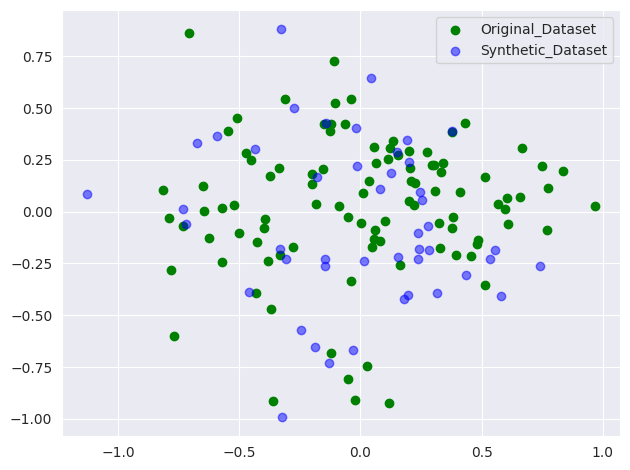

In [167]:
#Checking if synthetic samples generated are within the permissible values of the original dataset using Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
synth_values = synth_min_df.values
original_min_values = minority_dataset.values
#Vertically stacking the synthetic samples with the minority class samples
stacked_values = np.vstack([original_min_values, synth_values])
pca_values = pca.fit_transform(stacked_values)

#Plotting the values on a scatterplot
original_pca_values = pca_values[: len(original_min_values)]
synth_pca_values = pca_values[len(original_min_values): ]

plt.scatter(x = original_pca_values[:, 0], y = original_pca_values[:, 1], alpha = 1, c = 'g', label = 'Original_Dataset')
plt.scatter(x = synth_pca_values[:, 0], y = synth_pca_values[:, 1], alpha = 0.5, c = 'b', label = 'Synthetic_Dataset')
plt.legend()
plt.tight_layout()

**Concatenating the minority class samples with the synthetic samples to get 145 samples**

In [169]:
combined_min_df = pd.concat([minority_dataset, synth_min_df], axis = 0)

In [170]:
combined_min_df

,GE_SPOP,GE_FOXA1,GE_CTNNB1,GE_CLPTM1L,GE_DPYSL2,GE_NEIL1,GE_PITPNM2,GE_ATM,GE_EMG1,GE_ETV3,...,DM_NEIL1,DM_SLC27A4,DM_PITPNM2,DM_PTEN,DM_EMG1,DM_ETV3,DM_BRAF,DM_NKX3-1,DM_SALL1,TUMOR_STAGE
1,0.373498,0.790415,0.648564,0.367439,0.000000,0.638505,0.156215,0.673907,0.384063,0.807230,...,0.034757,0.000000,0.791218,0.045264,0.090997,0.942279,0.257308,0.093755,0.762329,1
4,0.363634,0.624428,0.892508,0.501788,0.472260,0.465397,0.619784,0.562305,0.450817,0.729161,...,0.182983,0.119817,0.907230,0.082071,0.155321,0.901625,0.171257,0.201274,0.695265,1
9,0.418700,0.702095,0.745375,0.430890,0.487548,0.669876,0.441037,0.506928,0.140151,0.867808,...,0.181650,0.299419,0.605663,0.045999,0.422079,0.885389,0.238896,0.548180,0.828444,1
11,0.470982,0.654804,0.799236,0.414669,0.421094,0.578125,0.466010,0.715588,0.355391,0.813532,...,0.172506,0.200640,0.782428,0.035299,0.285695,0.933832,0.175760,0.263804,0.776006,1
15,0.535495,0.574125,0.990674,0.227795,0.686890,0.486809,0.735071,0.832965,0.387468,0.947819,...,0.330505,0.531055,0.546693,0.048915,0.458723,0.868237,0.251513,0.654329,0.667877,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,0.550117,0.379521,0.865018,0.427286,0.816760,0.648861,0.486046,0.593844,0.326087,0.846099,...,0.200783,0.730257,0.527261,0.026811,0.680232,0.862022,0.178338,0.726223,0.599208,1
42,0.210884,0.720822,0.450947,0.539074,0.358657,0.626034,0.354878,0.317335,0.667100,0.322720,...,0.185975,0.184513,0.823070,0.030549,0.280161,0.929379,0.276554,0.277391,0.898555,1
43,0.314123,0.409577,0.616874,0.519699,0.667445,0.883975,0.669298,0.588609,0.370166,0.671036,...,0.168206,0.434528,0.590378,0.089622,0.605134,0.885898,0.334026,0.571847,0.757677,1
44,0.398710,0.265757,0.263137,0.540497,0.657178,0.987010,0.644521,0.445186,0.656400,0.448254,...,0.127623,0.690967,0.730675,0.287013,0.528408,0.921288,0.391597,0.399851,0.943984,1


**Finally combining the synthetic samples to the gleason dataset**

In [171]:
processed_gleason_df = pd.concat([df1_gleason, synth_min_df], axis = 0)
processed_gleason_df['TUMOR_STAGE'].value_counts()

TUMOR_STAGE
1    145
0    145
Name: count, dtype: int64

In [172]:
processed_gleason_df

,GE_SPOP,GE_FOXA1,GE_CTNNB1,GE_CLPTM1L,GE_DPYSL2,GE_NEIL1,GE_PITPNM2,GE_ATM,GE_EMG1,GE_ETV3,...,DM_NEIL1,DM_SLC27A4,DM_PITPNM2,DM_PTEN,DM_EMG1,DM_ETV3,DM_BRAF,DM_NKX3-1,DM_SALL1,TUMOR_STAGE
1,0.373498,0.790415,0.648564,0.367439,0.0,0.638505,0.156215,0.673907,0.384063,0.807230,...,0.034757,0.000000,0.791218,0.045264,0.090997,0.942279,0.257308,0.093755,0.762329,1
3,0.433556,0.637116,0.777338,0.559615,0.47676041700945415,0.623626,0.415425,0.539748,0.466929,0.599673,...,0.111825,0.085465,0.569465,0.047191,0.101831,0.930270,0.221800,0.257343,1.000000,0
4,0.363634,0.624428,0.892508,0.501788,0.4722603494002571,0.465397,0.619784,0.562305,0.450817,0.729161,...,0.182983,0.119817,0.907230,0.082071,0.155321,0.901625,0.171257,0.201274,0.695265,1
5,0.540453,0.630588,0.671140,0.275536,0.6624865041294341,0.476065,0.577890,0.824079,0.297729,0.899286,...,0.228759,0.230212,0.831449,0.040868,0.266358,0.943859,0.178990,0.505571,0.831493,0
6,0.506989,0.590670,0.727922,0.255442,0.733651313733152,0.691024,0.398213,0.644989,0.383090,0.713497,...,0.129223,0.502728,0.836422,0.036482,0.328812,0.954992,0.185582,0.391752,0.892649,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,0.550117,0.379521,0.865018,0.427286,0.81676,0.648861,0.486046,0.593844,0.326087,0.846099,...,0.200783,0.730257,0.527261,0.026811,0.680232,0.862022,0.178338,0.726223,0.599208,1
42,0.210884,0.720822,0.450947,0.539074,0.358657,0.626034,0.354878,0.317335,0.667100,0.322720,...,0.185975,0.184513,0.823070,0.030549,0.280161,0.929379,0.276554,0.277391,0.898555,1
43,0.314123,0.409577,0.616874,0.519699,0.667445,0.883975,0.669298,0.588609,0.370166,0.671036,...,0.168206,0.434528,0.590378,0.089622,0.605134,0.885898,0.334026,0.571847,0.757677,1
44,0.398710,0.265757,0.263137,0.540497,0.657178,0.987010,0.644521,0.445186,0.656400,0.448254,...,0.127623,0.690967,0.730675,0.287013,0.528408,0.921288,0.391597,0.399851,0.943984,1


**Shuffling the dataset to stop a neural network from capturing patterns associated with the order of the samples**

In [173]:
processed_gleason_df = processed_gleason_df.sample(frac = 1).reset_index(drop = True)
processed_gleason_df

,GE_SPOP,GE_FOXA1,GE_CTNNB1,GE_CLPTM1L,GE_DPYSL2,GE_NEIL1,GE_PITPNM2,GE_ATM,GE_EMG1,GE_ETV3,...,DM_NEIL1,DM_SLC27A4,DM_PITPNM2,DM_PTEN,DM_EMG1,DM_ETV3,DM_BRAF,DM_NKX3-1,DM_SALL1,TUMOR_STAGE
0,0.432423,0.684537,0.822607,0.316814,0.4709851944208241,0.715568,0.543569,0.487204,0.274678,0.688540,...,0.243542,0.411234,0.635612,0.155814,0.302947,0.823201,0.387566,0.267122,0.501857,0
1,0.651981,0.593167,0.781097,0.383588,0.5289369123135912,0.441682,0.502269,0.426688,0.378585,0.743497,...,0.247370,0.461636,0.501565,0.082054,0.602417,0.878148,0.151422,0.568170,0.760122,0
2,0.258006,0.687300,0.757727,0.470806,0.39466806443394375,0.575239,0.302726,0.603989,0.098050,0.789135,...,0.118404,0.060399,0.655711,0.097734,0.271404,0.947257,0.292598,0.266765,0.856432,0
3,0.509185,0.379166,0.705212,0.692013,0.5690901369065626,0.716598,0.397237,0.175336,0.791142,0.220172,...,0.268297,0.334598,0.758461,0.091041,0.546462,0.929881,0.230341,0.479145,0.856413,1
4,0.409782,0.555879,0.745461,0.512760,0.6222065294346786,0.532942,0.731040,0.531428,0.491394,0.738896,...,0.279690,0.226963,0.711622,0.018333,0.286202,0.933389,0.182340,0.335745,0.940982,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.460518,0.367789,0.654671,0.623647,0.40908523711864175,0.821999,0.470973,0.247439,0.732295,0.091874,...,0.225480,0.441568,0.842321,0.082189,0.529087,0.970427,0.300836,0.531533,0.859186,0
286,0.210884,0.720822,0.450947,0.539074,0.358657,0.626034,0.354878,0.317335,0.667100,0.322720,...,0.185975,0.184513,0.823070,0.030549,0.280161,0.929379,0.276554,0.277391,0.898555,1
287,0.254737,0.547904,0.433723,0.427648,0.3689294325470871,0.950996,0.685616,0.473819,0.277424,0.405607,...,0.102336,0.070332,0.811078,0.047023,0.331261,0.928612,0.339974,0.268768,0.968917,1
288,0.694129,0.402767,0.688736,0.637629,0.5448073015021624,0.728219,0.317776,0.235125,0.779453,0.269138,...,0.227703,0.394064,0.640907,0.053538,0.529044,0.961439,0.232177,0.456776,0.836273,0


**Balanced gleason dataset**

In [174]:
processed_gleason_df['TUMOR_STAGE'].value_counts()

TUMOR_STAGE
0    145
1    145
Name: count, dtype: int64

**Saving the final dataframe as a .CSV file**

In [175]:
processed_gleason_df.to_csv('GTGAN_Gleason_Score_Dataset.csv', index = False)